In [1]:
%run "../../shared/utilz_image_proc.ipynb"

In [2]:
import matplotlib.animation as animation

## inline video for IPython
from IPython.display import Video
from IPython.display import HTML


##

In [3]:
# def plot_animation( framez ):
#     fig = plt.figure() 
#     imgz = []
#     for i in range( len(framez)):
#         imgz.append( plt.imshow(framez[i], animated=True) )
        
#     ani = animation.ArtistAnimation(fig, imgz, 
#                                     interval=50, blit=True, repeat_delay=1000 )
    
#     plt.show();
    
    
# def plot_cv2animation(capture):
#     success = True
#     framez = []
#     while success:
#         success, img = capture.read() 
#         if success:
#             framez.append( img  )    
# #     print( f"Count framez = {len(framez)}")
# #     print( f"First Object = {framez[0].shape}")    
# #     print( f"First Object = {type(framez[0] ) }")
# #     plot_image( framez[0])
    
#     plot_animation( framez )
    
    
# def html_video( src_path ):
#     return HTML(f"""
#         <video alt="test" controls>
#             <source src="{src_path}" type="video/mp4">
#         </video>
#         """)

In [4]:
## CV2 imshow bila crashing
# Crashing happens b/c jupyter expects control back after a command block execution and cv2.imshow is using a wait callback. 
# So, solution is to explicitly close the window once done 
# Don't click the red/exit cross. Instead, tap on any key 

def plot_cv2Image(img, title='Image View'):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

def plot_cv2Video(capture, title='Video View'):
    while capture.isOpened(): ## go frame by frame
        success, img = capture.read()
        if success:
            cv2.imshow( title, img)
        if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
            break
    
    cv2.destroyAllWindows()    
    capture.release()

# Open CV and Image Processing
**libraries**
- `open cv2`


## 1. Reading Images, Videos and Webcam

`cv2.imread`
- Local file path: `cv2.imread( file_path_local )`
- Video capture: `cv2.VideoCapture( file_path_local )`
- Webcam capture: `cv2.VideoCapture( cam_id_number )` zero to use default webcam and then define params for the capture object




In [5]:
## video capture
video_path = "../../datasets/Part_4_Putting_the_gel_into_the_gel_tank.mp4"
cap = cv2.VideoCapture( video_path )

###----- CV2 approach but freezes ----- 
plot_cv2Video( cap )

###----- Matplotlib -----
# plot_cv2animation( cap )


###----- IPython  -----
#%%HTML
# Video( video_path )
# html_video( video_path )

In [6]:
## webcam stream capture
cap = cv2.VideoCapture( 0 ) 
cap.set(3, 640) ##width is id 3
cap.set(4, 480) ##height is id 4
cap.set(10, 100) ## brightness intensity id 10
# Video( 0 )
plot_cv2Video( cap )

True

True

False

## 2. Basic Functions
- Read in color, RGB2BGR, BGR2RGB, to Gray
- Blur images e.g gaussian
- Edge detection e.g. Canny 
- Dilate and Erode edgez to improve edge detection 

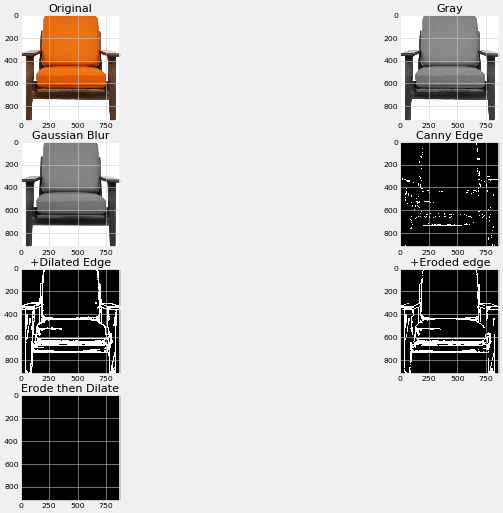

In [7]:
img_path = 'furniture.png'

# 1. Read image 
img = cv2.imread( img_path )

# 2. convert to gray scale 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. convert btwn RGB and BGR format
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

# 4. blur image
gaussian_blur = cv2.GaussianBlur(img_gray, (7,7), 0) ## kernel (7,7)


# 5. Canny edge detector
canny_edge = cv2.Canny( img, 80, 10) # 100, 100 threshold values

# 6. dilation - improve edge detection by fill in gaps in edges by increasing thickness of edges 
kern = np.ones( (5,5), np.uint8)
dilated_edge = cv2.dilate( canny_edge, kern, iterations=2) #kernel, # iterations affect size of thickness

# 7. erosion - make edges thinner; sorter smooths out
eroded_edge = cv2.erode(dilated_edge, kern, iterations=1)

# 8. Check erode first and then dilate <<< makes sense to dilate first else things disappear instead of getting enhanced
erode_then_dilate = cv2.dilate( cv2.erode(canny_edge, kern, iterations=1), kern, iterations=10) 

grid_plot_images([img, img_gray, gaussian_blur, 
                   canny_edge, dilated_edge, eroded_edge,
                   erode_then_dilate],
                 
                 titlz=['Original', 'Gray', "Gaussian Blur", 
                       'Canny Edge', '+Dilated Edge', '+Eroded edge',
                       'Erode then Dilate'], 
                 logit=False)

## 3. Resizing & Cropping Images
- Image origin is at top left corner 
- 


------- Original -------
image.shape = (928, 871, 3)
datatype = uint8
min = 0 , max = 255


------- Resize down/small -------
image.shape = (200, 300, 3)
datatype = uint8
min = 0 , max = 255


------- Resize up/enlarge -------
image.shape = (2000, 3000, 3)
datatype = uint8
min = 0 , max = 255


------- Cropped -------
image.shape = (800, 300, 3)
datatype = uint8
min = 0 , max = 255


------- Single channel only -------
image.shape = (928, 871)
datatype = uint8
min = 0 , max = 255



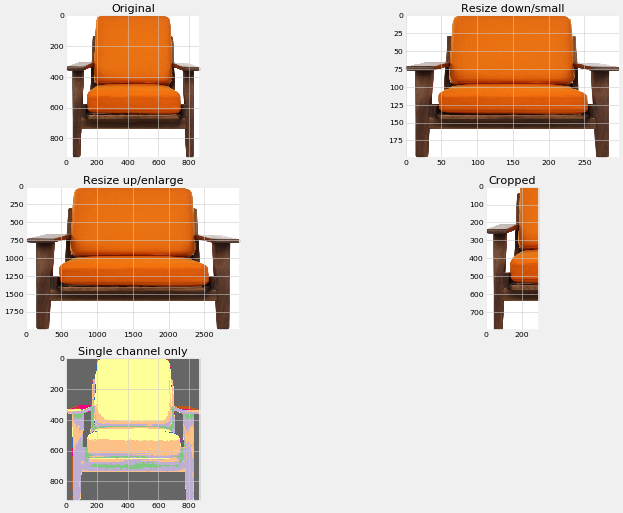

In [8]:
# xtics of the image
# 1. resized << note indexing is height and then width 
imagez = [
    img, 
    cv2.resize( img, (300, 200)),   # aspect ratio not maintained
    cv2.resize( img, (3000, 2000)), # aspect ratio not maintained
    img[ 100:900, 0:300, :],          # crop using ndarray slicing
    img[ :, :, 1]         # B G R = 0,1,2:  channel only
]

titlez = [
    'Original',
    'Resize down/small',
    'Resize up/enlarge', 
    'Cropped',
    'Single channel only'
]

## xtics of images, logit=False
## plots of images
grid_plot_images( imagez, titlez, cmapd='Accent')

## 4. Shapes and Text
- Drawing shapes and text on images

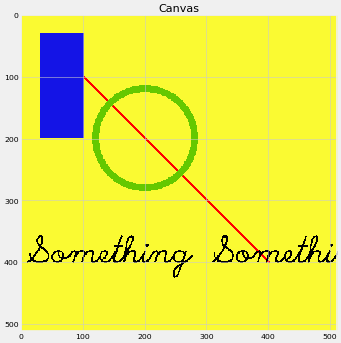

In [9]:
## 1. def blank canvas
canvas = np.zeros( (512, 512, 3) , np.uint8)

## 2. add color
canvas[:] = 250, 250, 50 ## R G B else B G R on cv2
#canvas[0,0,:]

## 3. Add line to canvas 
cv2.line( canvas, (100,100), (400,400), (255,0,0), 3)

## 4. add rectangle
cv2.rectangle( canvas, (30,30), (100, 200), (20,20,230), cv2.FILLED)

## 5. add circle 
cv2.circle( canvas, (200, 200), 80, (100, 200, 0), 10) #cv2.FILLED

## 6. put text 
cv2.putText(canvas, 'Something Something', (10, 400), 
            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX|cv2.FONT_ITALIC, 
            2, (0,0,0), 2) #scale, color, thickness

imagez = [
    canvas, 
]

titlez = [
    'Canvas', 
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 5. Warp Perspective
- E.G. to get birds eye view 



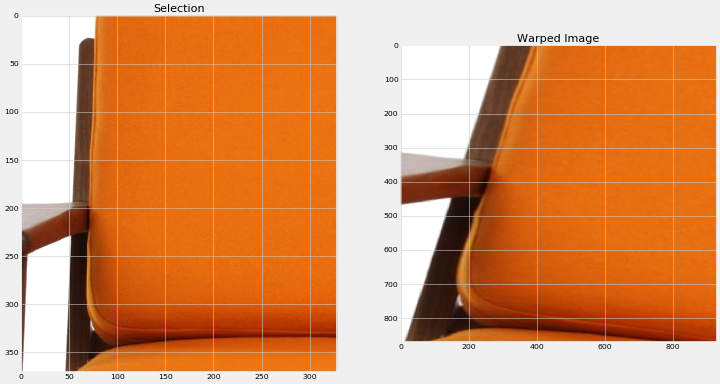

In [10]:
## Define the corners for the birds eye view perspective 
W, H = img.shape[:2] #250, 350
pts = np.float32([
    [111, 219],
    [287, 188],
    [154, 482],
    [352, 440]
])

pts_map = np.float32([
    [0, 0],
    [W, 0],
    [0, H],
    [W, H]
])

matrix = cv2.getPerspectiveTransform(pts, pts_map)
img_out = cv2.warpPerspective(img, matrix, (W,H) )

imagez = [
    img[111:482, 111:440, :],
    img_out, 
    
]

titlez = [
    'Selection', 
    'Warped Image', 
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 6. Joining Images
- `np.hstak` expects same dimension and number of channels. Resulting image will be n factors of the one image; cannot size as you stack and can go out of frame. So extra steps to resize etc  

- 

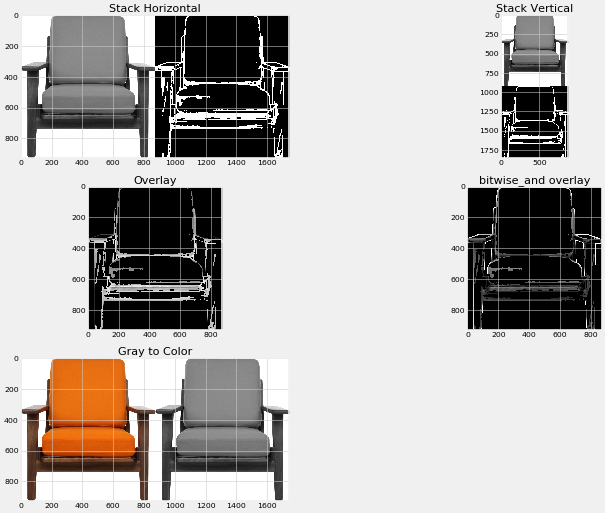

In [11]:

imagez = [
    np.hstack( (img_gray, eroded_edge) ),
    np.vstack( (img_gray, eroded_edge)),
    img_gray * eroded_edge,
    cv2.bitwise_and(img_gray, eroded_edge),
    np.hstack( (img, cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR) )),    
    
]

titlez = [
    'Stack Horizontal',      #Join stacked 
    'Stack Vertical',      #Join stacked 
    'Overlay',   #Join overlay
    'bitwise_and overlay', 
    'Gray to Color'
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

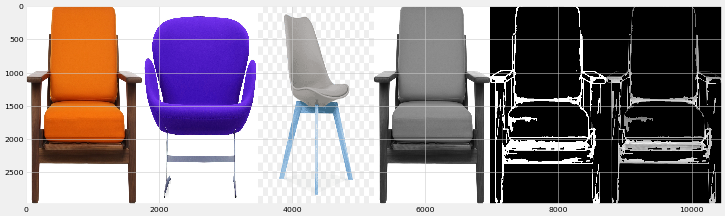

In [12]:
## define own method to resize and deal different channels and sizes
# E.G. below but is not handling aspect ratio, align multi-channel, multi row << is rough showcase
def stack_images( imagez, rescale=1, ncolz=None ):
    w = np.max([x.shape[0] for x in imagez])
    h = np.max([x.shape[1] for x in imagez])     
    stacks =  []
    for img in imagez:
        stacks.append( cv2.resize(img, (w, h) )) # cv2.cvtColor( cv2.resize(img, (w, h) ), cv2.COLOR_GRAY2BGR )
        
        
    plt.imshow( np.hstack(stacks ) )
    
    
stack_images([img, cv2.imread('furniture2.png'), cv2.imread('furniture3.png'),
              cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR),  
              cv2.cvtColor( eroded_edge, cv2.COLOR_GRAY2BGR ),
             cv2.cvtColor(img_gray * eroded_edge,cv2.COLOR_GRAY2BGR )])

## 7. Color Detection
- First convert to HSV space b/c
- Then defin color range values including hues and limits of interest 
    - Can use track bars to interactively determine optimum min/max values of the target color. Use `cv2.createTrackbar`, `cv2.getTrackbarPos` and `cv2.inRange` 
    
     - This will create a mask for the desired color 
- Then use `cvt.bitwise_and` to add two images and create a new image  

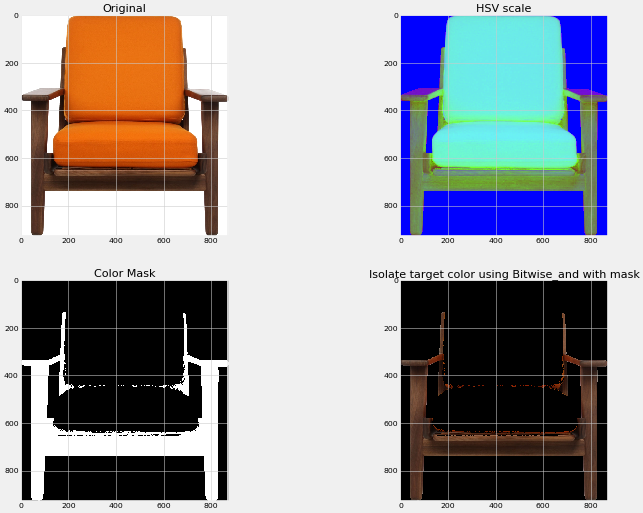

In [13]:
## Detect orange or brown color in image
# hardcoding here else should use cv2.crateTrackbar or such to seek 
hue_min, hue_max = 10, 150
sat_min, sat_max = 30, 250
val_min, val_max = 0, 150

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )

lower = np.array( [hue_min, sat_min, val_min ])
upper = np.array( [hue_max, sat_max, val_max ])

mask = cv2.inRange( img_hsv, lower, upper) ## the desired color is white and all else black

## invert mask
# print(mask.shape)
# print(mask[0])
#mask = mask -1 
#mask = -1*mask
# print(mask.shape)
# print(mask[0])

img_out = cv2.bitwise_and(img, img, mask=mask)

imagez = [
    img,
    img_hsv,
    mask, 
    img_out,
]

titlez = [
    'Original',
    'HSV scale',
    'Color Mask',
    'Isolate target color using Bitwise_and with mask'
]

grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 8. Contour/Shape Detection
- Detect the corner points and use that to determine shape 


------- <class 'numpy.ndarray'> -------
image.shape = (2212, 3318, 3)
datatype = uint8
min = 0 , max = 255



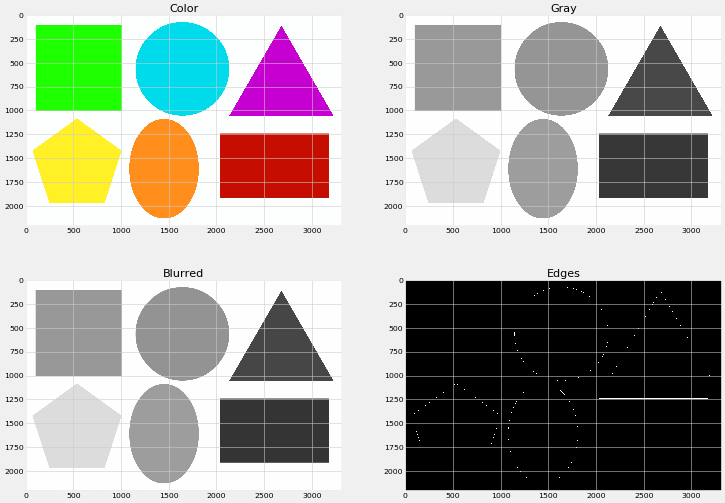

In [14]:
# ip = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSCiR5GL_VfLypipe_WvK0g3I-0WrxzstBjL5hfZVgCd53axcAC&usqp=CAU"
# ip = "https://lh3.googleusercontent.com/proxy/k3V64hM-jUPMm4m-nznaLTyb5-Jq2lYTNNMy5S7mITbQvszVSoRzt5e5Q8r9g0gQtox3OvC2UdToiTzRctbiGeSWHhsRmfGwhTVS2VweVMDRLIsjwLYYPdxGvPwWNg"
# ip = "https://image.shutterstock.com/image-vector/simple-geometry-shapes-set-geometric-260nw-1311697157.jpg"
# ip = "https://lh3.googleusercontent.com/proxy/v7YJrXZtLhyVfFj8JBkyt6v6mH8UZ7mZFUJSvjYGlJ9MYLn0_1LVMBWt4olmumotPySO5JVHvnrKWJjSfPgtXrQX9Bzbz70"
# ip = "https://study.com/cimages/multimages/16/similar_shapes_1.png"
# ip = "https://c8.alamy.com/comp/X666HD/colourful-shapes-against-a-white-background-X666HD.jpg"
# ip = "https://www.guruparents.com/image-files/shapes.png"
ip = "https://s3.amazonaws.com/tinycards/image/0024e97fe5cc1e888dead0474480cd8c"
# ip = "https://persiangulfpublication.com/index_files/image1419.jpg"
simg, simg_gray = fetch_image(ip)

plot_image(simg)

# ## crop out junk for that particular file
# simg = simg[ 45:-40, 40:-40, :]
# simg_gray = cv2.cvtColor( simg, cv2.COLOR_RGB2GRAY )

prep_img = cv2.GaussianBlur(simg_gray, (3,3), 1)

simg_edgez = cv2.Canny(prep_img, 50, 50)

kern = np.ones((5,5))
simg_edgez = cv2.erode( cv2.dilate(simg_edgez, kern, iterations=1), kern, iterations=1)

grid_plot_images( 
    [simg, simg_gray, prep_img, simg_edgez], 
    ['Color', 'Gray', 'Blurred', 'Edges'],
    logit=False)

In [15]:
# canvas = np.zeros_like( simg )

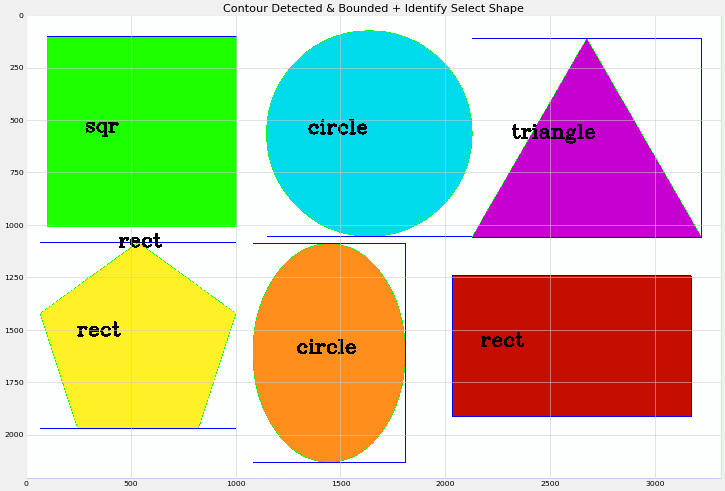

In [16]:
## get contours 

img_contourz = simg.copy()

def get_contours(cimg, canvas): #, outimg=img_detected_shape):
    countourz, hierarchyz = cv2.findContours(cimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) ## cv2.RETR_EXTERNAL = retrieve extreme outer contours 
    
    for c in countourz:
        ##find area, then draw it
        area = cv2.contourArea(c)
        #print(area)
        
        ##work with minimum area threshold to filter out noise
        if area >= 500:
            cv2.drawContours( canvas, c, -1, (0,255,0), 2 )
            
            #calc arc length or contour perimeter to identify corners
            peri = cv2.arcLength(c, True) ### True b/c closed shape
            # approx number of contours
            n_contz = cv2.approxPolyDP(c, 0.03*peri, True) ## True b/c closed shape
            n_cornerz = len(n_contz) 
#             print(f"# Corners = {n_cornerz}")
            
            #gen a bounding box <, can be used @ center, total width, etc of an object 
            x, y, w, h = cv2.boundingRect( n_contz )
            
            ## now categorize:
            txt_label = ''
            
            if n_cornerz >=3 and n_cornerz <= 3:
                txt_label = 'triangle'
            elif n_cornerz >= 4 and n_cornerz <= 6:
                ar = w/h
                if ar >= 0.97 and ar <= 1.03:
                    txt_label = 'sqr'
                else:
                    txt_label = 'rect'
            elif n_cornerz > 6:
                txt_label = 'circle'
            else:
                txt_label = 'unknown'
            
            cv2.rectangle(canvas, (x,y), (x+w, y+h), (0,0,255), 2)
            cv2.putText( canvas, txt_label,
                       (x+(h//5)-1, y+(h//2)) , ## center of objct
                       cv2.FONT_HERSHEY_COMPLEX, 3, (3,3,3), 10)
        


get_contours(simg_edgez,  img_contourz)

plot_image( img_contourz , title='Contour Detected & Bounded + Identify Select Shape', logit=False)


## 9.  Using OpenCV Cascades
**Viola And Jones Method**
- One of the earliest methods that allowed real time object detection 
- Not most accurate but is fast and used by most cameras

- **OpenCV cascades**
    - repo for faces, numberplates etc fr training
    - `cv2.cascadeClassifier`


In [17]:
# ip =  "https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_main_beauty.png"
# ip = "https://i.guim.co.uk/img/media/c0386e205b5ec0340c1f81665acd0a2c3fb31132/453_0_1323_794/master/1323.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctYWdlLTIwMTUucG5n&s=4a3502ab3e1ef91f9e08cbd049f062c8"
# ip = "https://cdn.cultofmac.com/wp-content/uploads/2015/11/6936762-3x2-700x467.jpg"
# ip = "https://hamptonroadsmessenger.com/wp-content/uploads/2016/05/Teens-LB0609-4804.jpg"
# img, gimg = fetch_image(ip)

# grid_plot_images([img, gimg])


In [18]:
def mark_objects_at_cascades( fp, dcascade ):
    ## 1. fetch image
    img, gimg = fetch_image(fp) 
    ## 2. Find target objects e.g. faces
    faces = dcascade.detectMultiScale(gimg, 1.1, 4)
    ## 3. Draw bounding boxes around the detected faces 
    for f in faces:
        x, y, w, h = f
        cv2.rectangle(img, (x,y), (x+w, y+h), (200,0,255), 3)
    
    return img


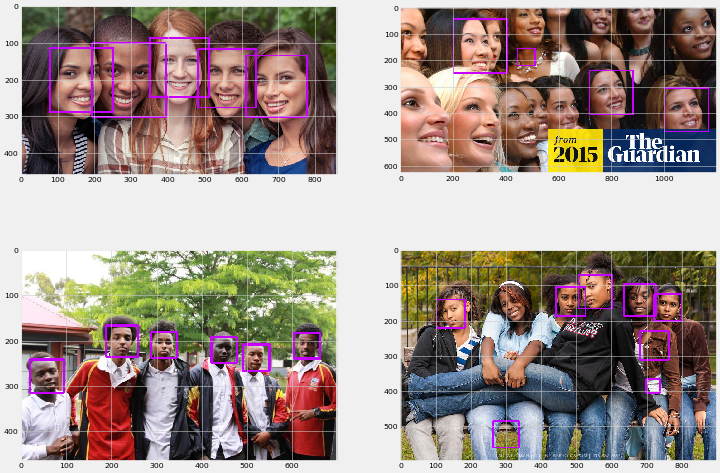

In [19]:
## setup cascade @ FACES
fp = "../../datasets/haarcascade_frontalface_default.xml" 
face_cascade = cv2.CascadeClassifier( fp ) 


fipz = [
    "https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_main_beauty.png",
    "https://i.guim.co.uk/img/media/c0386e205b5ec0340c1f81665acd0a2c3fb31132/453_0_1323_794/master/1323.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctYWdlLTIwMTUucG5n&s=4a3502ab3e1ef91f9e08cbd049f062c8",
    "https://cdn.cultofmac.com/wp-content/uploads/2015/11/6936762-3x2-700x467.jpg",
    "https://hamptonroadsmessenger.com/wp-content/uploads/2016/05/Teens-LB0609-4804.jpg",
#     "https://image.shutterstock.cm/image-photo/three-happy-girls-having-fun-260nw-552375379.jpg"
]
 

grid_plot_images( [ mark_objects_at_cascades(f, face_cascade) for f in fipz], logit=False)

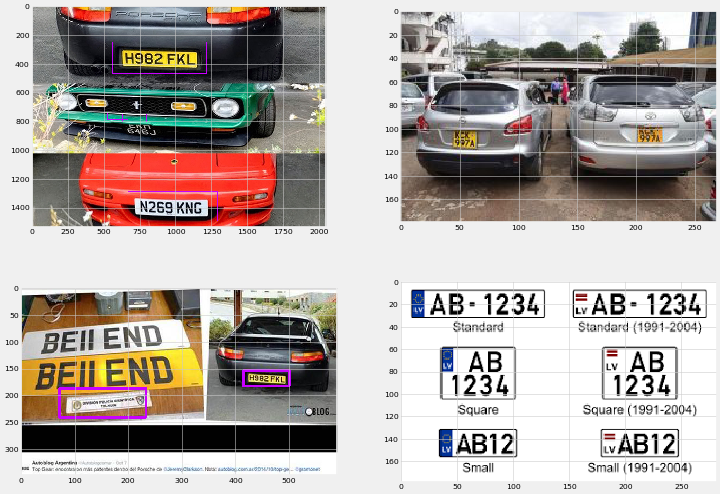

In [20]:
## setup cascade @ CAR NUMBER PLATES 
# fp = "../../datasets/haarcascade_licence_plate_rus_16stages.xml" 
fp = "../../datasets/haarcascade_russian_plate_number.xml"
lplate_cascade = cv2.CascadeClassifier( fp ) 


fipz = [
    "https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/10/20/19/TopGear-Rex.jpg",
    "https://samrack.com/wp-content/uploads/bfi_thumb/clone-37vkfef86csjlf4cw4rw96.jpg",
    "https://cdn.images.express.co.uk/img/dynamic/1/590x/secondary/210314.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQOWWnWFhi1V07z85Fx0W1OV0CJnHgjxU36Wi-5Rc1T4CspuEHT&usqp=CAU",
#     "https://thumbs.dreamstime.com/b/set-car-number-plates-europe-uk-america-vector-registration-signs-us-south-britain-russia-ukraine-brazil-egypt-switzerland-175178583.jpg",
]
 

grid_plot_images( [ mark_objects_at_cascades(f, lplate_cascade) for f in fipz], logit=False)

## 10. Virtual Paint
- Use HSV color space to isolate target color
- Read webcam stream and contour target color objects
- Paint trail @ target color 


In [21]:
## setup fake webcam
# !sudo modeprobe v4l2loopback
#### --- desktop record grab_x, grab_y
# !ffmpeg -f x11grab -r 15 -s 960x720 -i :1 -vcodec rawvideo -pix_fmt yuv420p -threads 0 -f v4l2 /dev/video0
#### --- file stream 
# !export VIDE0=~/Videos/webcam_sim.mp4
# !ffmpeg -re -stream_loop -1 -i $VIDEO -map 0:v -f mpegts udp://localhost:50000
                    
## find color @ hue, saturation, value min and max
def color_traits_trackbar(title='ColorzPicker'):
    def empty():
        pass 
    
    hue_min, hue_max = 0, 255
    sat_min, sat_max = 0, 255
    val_min, val_max = 0, 255
    
    barz = ['Hue Min', 'Hue Max', 'Sat Min', 'Sat Max', 'Val Min', 'Val Max'] 
    varz = [hue_min, hue_max, sat_min, sat_max, val_min, val_max]
    
    ## show trackbar
    cv2.namedWindow( title )
    cv2.resizeWindow( title, 640, 240)
    
    for b in barz:
        cv2.createTrackbar(b, title, 0, 255, empty)
    
    ## read values
    while True:
        #capture_webcam()
        for b, v in zip(barz, varz):
            v = cv2.getTrackbarPos(b, title)
            print( f"{b}  = {v}" )
    
    
def find_color(img, hmin=0, hmax=255, smin=0, smax=150, vmin=150, vmax=200):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) 
    lower = np.array([hmin, smin, vmin])
    upper = np.array([hmax, smax, vmax])
    mask = cv2.inRange(img_hsv, lower, upper)
    
#     plot_image(mask, title='HSV Mask')
#     plot_cv2Image(mask)
    
    return mask


## Seek contour and bounding box of the object
def get_contour_and_bbox(mask_img, out_img, athresh=500, tfact=0.02):
    contz, hier = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE ) 
    
    x, y, w, h = 0, 0, 0, 0
    
    for c in contz:
        a = cv2.contourArea( c )
        if a > athresh:
            cv2.drawContours( out_img, c, -1, (200,0,255), 3)
            peri = cv2.arcLength(c, True )
            appx = cv2.approxPolyDP(c, tfact*peri, True)
            x, y, w, h = cv2.boundingRect( appx )
    
    ## return tip of object
    return x + w//2, y
    

## run web cam & return captured frames 
def capture_webcam(id=0, fw=640, fh=480, fint=150, title='WebCam Sim'):
    cap = cv2.VideoCapture(id)
    cap.set(3, fw)
    cap.set(4, fh)
    cap.set(10, fint)
    
    framez = []
    
    while cap.isOpened(): ## go frame by frame
        success, img = cap.read()
        if success:
            cv2.imshow( title, img)
            framez.append( img )
        if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
            break
    
    cv2.destroyAllWindows()    
    cap.release()
    
    return framez
        
    


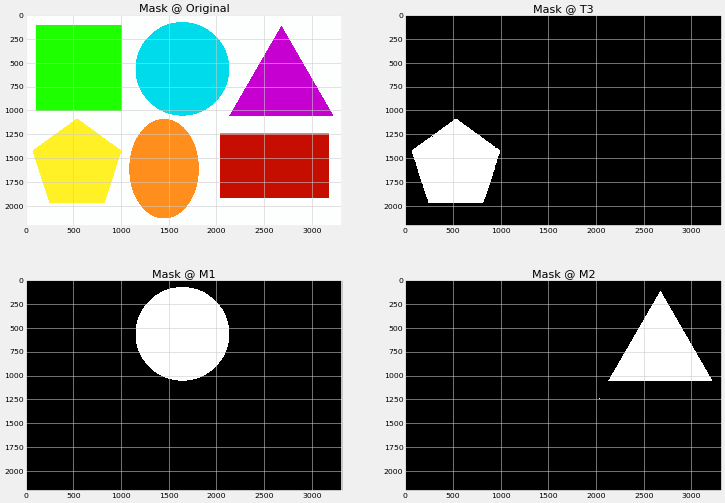

In [22]:
my_color_maskerz = [    
#     [5, 9, 107, 255, 9, 255],
#     [133, 159, 56, 156, 0, 255],
    [ 57, 100, 100, 230, 0, 255],
    
    [20, 55, 76, 255, 0, 255],
    [120, 155, 76, 255, 0, 255],
#     [57, 90, 107, 15, 0, 255],
]

lbz = ['T1', 'T2', 'T3', 'M1', 'M2', 'M3']
masks_rez = []
for x in my_color_maskerz:
    masks_rez.append( find_color(simg, *x) )
#     print( f"{np.array(rez).shape}" )
grid_plot_images( (simg, *masks_rez), [f"Mask @ {l}" for l in ('Original', *lbz[2:5])], logit=False)

In [23]:
### Identify color on object in webcam video stream
#framez = capture_webcam()

cap = cv2.VideoCapture( 0 )
cap.set(3, 640)
cap.set(4, 480)
cap.set(10, 150)

ptz = []
while cap.isOpened(): ## go frame by frame
    success, img = cap.read()
    if success:
        ## Detect target color contour AND draw trail 
        for i, c in enumerate(my_color_maskerz):
            # a. identify target color contour 
            mask = find_color(img, *c) 
            x, y = get_contour_and_bbox(mask, img)
            if x!=0 and y!= 0:
                ptz.append( [(x,y), c[i:i+3] ] ) ## is context array so watch:Index error
            
            # b. draw trail
            for pt in ptz:
                 _ = cv2.circle(img, pt[0], 30, pt[1], cv2.FILLED)
            
        cv2.imshow( 'WebCamView', img)
        
    if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
        break

cv2.destroyAllWindows()    
cap.release()

True

True

False

## 11. Document Scanner

- Use webcam to capture 
- Detect document edges 
- Apply warp perspective on doc image to straighten 
- Apply filters on doc image to enhance scan

In [24]:
## Helperz

## Resize image, 
def preprocess_scan_image(img, kern=(5,5), blursig=1, dil_iterz=1):    
    # b. grayscale it for filterz
    gimg = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )
    
    # c. blur and edge detect
    img_edgez = cv2.Canny( cv2.GaussianBlur(gimg, kern, blursig), 200, 200)
    img_edgez = cv2.erode( 
            cv2.dilate(img_edgez, np.ones(kern), iterations=dil_iterz), 
            np.ones(kern), iterations=1)
    
    return img_edgez


## Seek contour and bounding box of the doc - doc is assumed to be largest contour
def get_doc_contour_and_bbox(mask_img, out_img, athresh=5000, tfact=0.02):
    contz, hier = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE ) 
    
    x, y, w, h = 0, 0, 0, 0
    
    max_area = 0
    biggest_obj = None
    
    # a. identify doc contour and box as largest object
    for c in contz:
        a = cv2.contourArea( c )
        if a > athresh:
#             cv2.drawContours( out_img, c, -1, (200,0,255), 3)
            peri = cv2.arcLength(c, True )
            appx = cv2.approxPolyDP(c, tfact*peri, True)
            
            if len(appx) == 4 and a > max_area: ## is a rect and is larger
                biggest_obj = appx
                max_area = a
                
    # b. draw bounding box on identified document 
    if not biggest_obj is None:
        x, y, w, h = cv2.boundingRect( biggest_obj )
        cv2.rectangle( out_img, (x, y), (x+w, y+h), (200,0,255), 3)
    
    ## c. return bounding box of doc
    #return x, y, w, h
    return biggest_obj


## Warp image to get bird's eye view
def reshape_box_approx(bbox):
    tmp_ptz = bbox.reshape( (4,2) )
    
    ptz = np.zeros( (4,1,2), np.int32 )
    
    ## use sum to identify origins as the smallest and (x+w,y+h) as the largest
    sumz = tmp_ptz.sum(axis=1)
    #print( f'Sumz = {sumz}')
    ## use diff to identify w and h size
    diffz = np.diff(tmp_ptz, axis=1)
    #print( f'Diffz = {diffz}')
        
    ptz[0] = tmp_ptz[ np.argmin(sumz) ] ## origin
    ptz[3] = tmp_ptz[ np.argmax(sumz) ] ## endpoint (origin + (w,h))
    ptz[1] = tmp_ptz[ np.argmin(diffz) ] ## w
    ptz[2] = tmp_ptz[ np.argmax(diffz) ] ## h     
    #print( f"MAP:\n{ptz}\n<<<<<<< END")
    
    return ptz

def get_warp_perspective(img, biggest_approx, imgW=480, imgH=640):     
    #print( ">>>> ", biggest_approx , "\n")    
    pts1 = np.float32( reshape_box_approx(biggest_approx) )
    pts2 = np.float32([[0,0], [imgW,0], [0, imgH], [imgW, imgH]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    warped_img = cv2.warpPerspective(img, matrix, (imgW, imgH) )    
               
    # e. crop edges to clean up
    w, h, *_ = warped_img.shape 
    warped_img = warped_img[ edge_margin:w-edge_margin, edge_margin:h-edge_margin]
    # f.resize to fit screen
    _ = cv2.resize(warped_img, (imgW, imgH) )
    
    return warped_img

In [56]:
#framez = capture_webcam( title='DocScanner')

fW, fH = 640, 480

cap = cv2.VideoCapture( 0 )
cap.set(3, fW)
cap.set(4, fH)
cap.set(10, 150)

ptz = []
edge_margin = 10

scanned_image = None

while cap.isOpened(): ## go frame by frame
    success, img = cap.read()
    if success:
        # a. resize img
        _ = cv2.resize(img, (fW, fH) )
        
        # b. preprocess
        img_edgez = preprocess_scan_image( img , dil_iterz=2)
        
        # c. get contours. Seeking largest object detected as doc
        biggest_approx = get_doc_contour_and_bbox( img_edgez, img)        
        
        # d. warp to bird's eye perspective if doc found
        if not biggest_approx is None:
            img = get_warp_perspective(img, biggest_approx) 
            # e. auto save scanned doc 
            scanned_image = img.copy()
            _ = cv2.imwrite( "scanned_doc.jpg", img)
        else:
            _ = cv2.putText(img, 'Position Document Properly', 
                        (fW//5, fH//2-20),
                       cv2.FONT_HERSHEY_COMPLEX, 2, (3,3,3), 2)
        cv2.imshow( 'DocSanner', img)
        
    if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
        break

cv2.destroyAllWindows()    
cap.release()

True

True

False

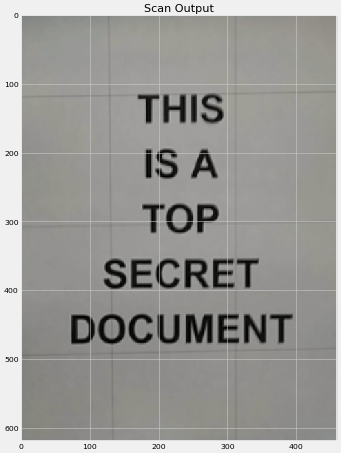

In [57]:
## View scanned image AND Filterz
imagez = [
    scanned_image,
]
titlez = [
    'Scan Output',
]

grid_plot_images(imagez, titlez, logit=False)

## 12. Live Number Plate Detection
- Using openCV Cascades

In [60]:

def cam_mark_objects_at_cascades( src_img, dcascade, minarea=500 ):
    ## 1. gray scale it
    gimg = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    ## 2. Find target objects e.g. faces
    objz = dcascade.detectMultiScale(gimg, 1.1, 4)
    ## 3. Draw bounding boxes around the detected faces 
    rez_img = None
    for f in objz:
        x, y, w, h = f
        area = w * h
        if area > minarea:
            cv2.rectangle(src_img, (x,y), (x+w, y+h), (200,0,255), 3)
            cv2.putText(src_img, 'Number plate',
                       (x, y-5),
                       cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (30, 20, 200), 1)
            rez_img  = src_img[ y:y+h, x:x+w]
    
    #return number plate img
    return rez_img

## Webcam View
fW, fH = 640, 480
cap = cv2.VideoCapture( 0 )
cap.set(3, fW)
cap.set(4, fH)
cap.set(10, 150)

edge_margin = 10

saved_numberplatez = []

while cap.isOpened(): ## go frame by frame
    success, img = cap.read()
    if success:        
        # b. preprocess
        img_edgez = preprocess_scan_image( img , dil_iterz=2)
        
        # c. get contours. Seeking largest object detected as doc
        biggest_approx = get_doc_contour_and_bbox( img_edgez, img)        
        
        # d. use cascade to mark number plate
        ig = cam_mark_objects_at_cascades(img, lplate_cascade)
        if not ig is None:
            saved_numberplatez.append( ig )
        
        cv2.imshow( 'Number Plate Scanner', img)
        
    if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
        break

cv2.destroyAllWindows()    
cap.release()




True

True

False

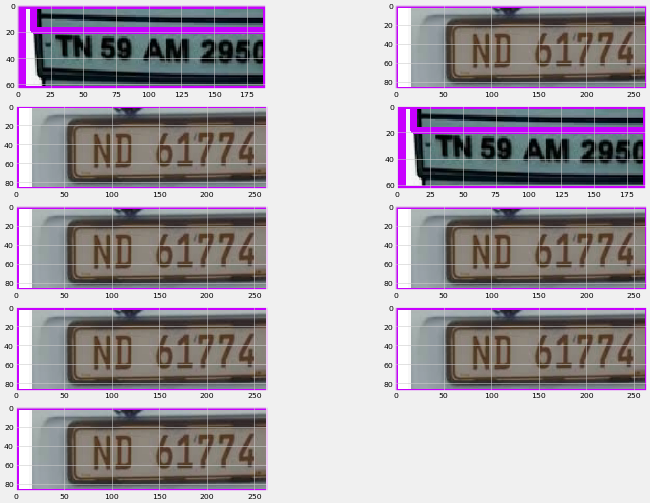

In [61]:
## Collected number plates
ln = len(saved_numberplatez)
grid_plot_images(saved_numberplatez[max(0, ln-10): -1], logit=False)

## 13. 